<div style="border: thin solid black; padding: 5px">

# Part B - Classify player position

- Train on data from FIFA 19. Predict the player_position variable using other skill statistics for
players in the FIFA 20 Edition. Train on all players from FIFA 19
- Graphically represent the predicted player_position for the players in Test Set

### Instructions :
1. Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning.
2. The final score will be assigned using Classification accuracy

### Test Set: 
Players from the following Clubs
- FC Barcelona
- FC Bayern München
- Real Madrid
- Paris Saint-Germain
- Juventus
- Atlético Madrid
- Manchester City
- Liverpool
- Manchester United

In [1]:
# settings
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [2]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
# load data
fifa19_df = pd.read_csv('data/players_19.csv')

In [4]:
fifa19_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [5]:
fifa19_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(11), object(77)
memory usage: 14.1+ MB


In [6]:
fifa19_sel = fifa19_df[['age', 'height_cm', 'weight_kg','preferred_foot', 'value_eur', 'wage_eur', 'release_clause_eur', 'shooting', 'defending', 'physic', 'club', 'overall', 'player_positions', 'team_position']]

In [7]:
# drop all rows with NaNs
fifa19_sel_cleaned = fifa19_sel.dropna()
fifa19_sel_cleaned.head()

,age,height_cm,weight_kg,preferred_foot,value_eur,wage_eur,release_clause_eur,shooting,defending,physic,club,overall,player_positions,team_position
0,33,187,83,Right,77000000,405000,127100000.0,93.0,35.0,79.0,Juventus,94,"ST, LW",LW
1,31,170,72,Left,110500000,565000,226500000.0,91.0,32.0,61.0,FC Barcelona,94,"CF, RW, ST",RW
2,26,175,68,Right,118500000,290000,228100000.0,84.0,32.0,59.0,Paris Saint-Germain,92,"LW, CAM",CAM
4,27,181,70,Right,102000000,355000,196400000.0,86.0,60.0,78.0,Manchester City,91,"CAM, CM",RCM
5,32,184,82,Right,51000000,380000,104600000.0,63.0,91.0,84.0,Real Madrid,91,CB,LCB


In [8]:
fifa19_sel_cleaned.player_positions

0            ST, LW
1        CF, RW, ST
2           LW, CAM
4           CAM, CM
5                CB
            ...    
17765       CM, CDM
17766            ST
17767            CM
17768            RB
17769            CM
Name: player_positions, Length: 14396, dtype: object

In [9]:
def create_position(df):
    df_new = df.copy()
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
      df_new.loc[df.team_position == i , 'position'] = 'Strikers'

    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
      df_new.loc[df.team_position == i , 'position'] = 'Midfielder'

    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
      df_new.loc[df.team_position == i , 'position'] = 'Defender'
    
    return df_new

In [10]:
fifa19_sel2 = create_position(fifa19_sel_cleaned)
fifa19_sel2

,age,height_cm,weight_kg,preferred_foot,value_eur,wage_eur,release_clause_eur,shooting,defending,physic,club,overall,player_positions,team_position,position
0,33,187,83,Right,77000000,405000,127100000.0,93.0,35.0,79.0,Juventus,94,"ST, LW",LW,Strikers
1,31,170,72,Left,110500000,565000,226500000.0,91.0,32.0,61.0,FC Barcelona,94,"CF, RW, ST",RW,Strikers
2,26,175,68,Right,118500000,290000,228100000.0,84.0,32.0,59.0,Paris Saint-Germain,92,"LW, CAM",CAM,Midfielder
4,27,181,70,Right,102000000,355000,196400000.0,86.0,60.0,78.0,Manchester City,91,"CAM, CM",RCM,Midfielder
5,32,184,82,Right,51000000,380000,104600000.0,63.0,91.0,84.0,Real Madrid,91,CB,LCB,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,19,180,72,Right,60000,1000,131000.0,32.0,46.0,49.0,Cork City,47,"CM, CDM",SUB,NaN
17766,18,178,75,Right,60000,1000,125000.0,43.0,23.0,53.0,SpVgg Unterhaching,47,ST,RES,NaN
17767,20,181,64,Right,60000,1000,167000.0,35.0,44.0,52.0,Guangzhou R&F FC,47,CM,LCM,Midfielder
17768,19,179,73,Right,40000,1000,66000.0,42.0,41.0,56.0,SpVgg Unterhaching,47,RB,SUB,NaN


Text(0.5, 0, 'team_position')

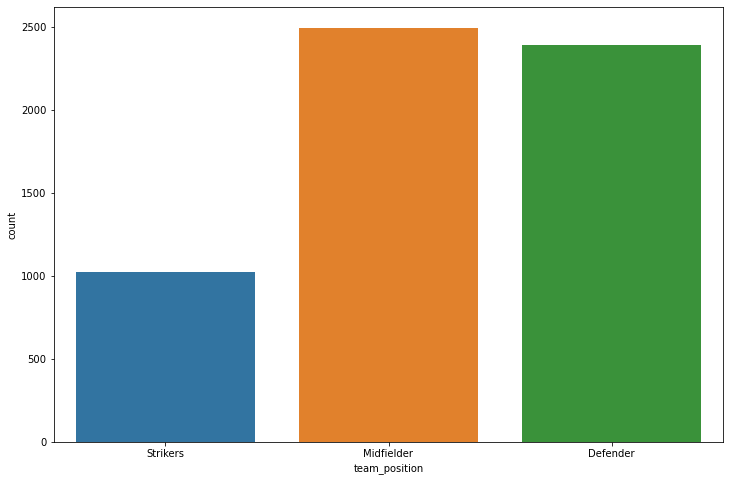

In [11]:
# Distribution of each position
plt.figure(figsize=(12, 8))
sns.countplot(x = 'position', data =fifa19_sel2)
plt.xlabel('team_position')

The total count of Midfielder is larger than that of Strikers and Defenders.

<Figure size 864x576 with 0 Axes>

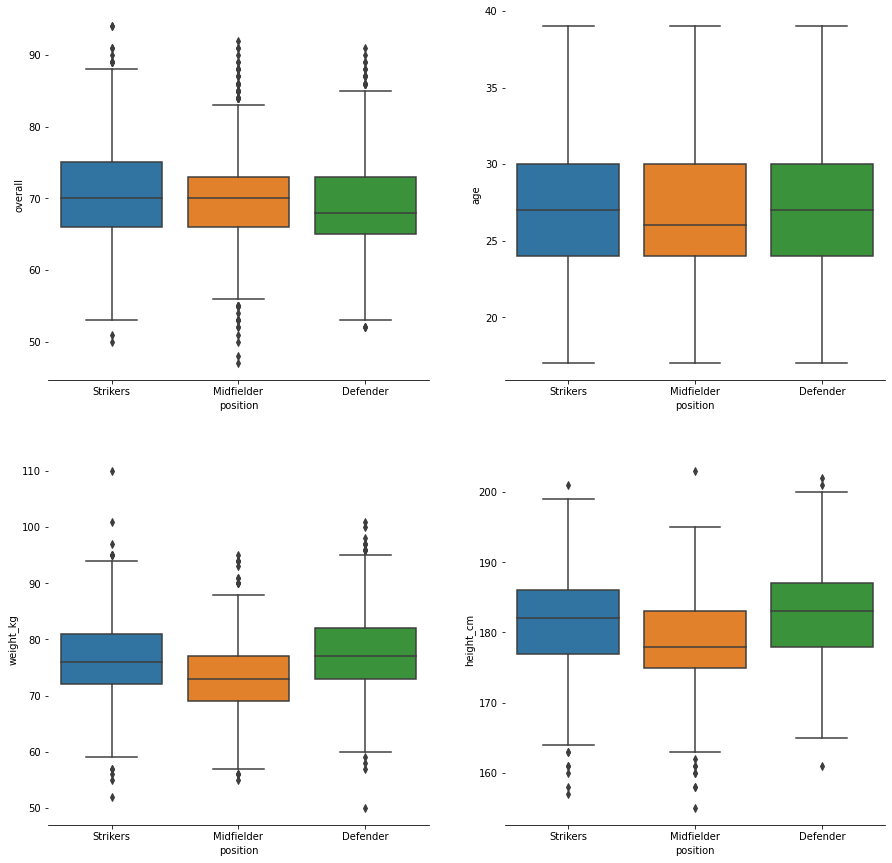

In [12]:
plt.figure(figsize=(12, 8))

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)

sns.boxplot('position', 'overall', data = fifa19_sel2, ax=axes[0, 0])
sns.boxplot('position', 'age', data = fifa19_sel2, ax=axes[0, 1])

sns.boxplot('position', 'height_cm', data = fifa19_sel2, ax=axes[1, 1])
sns.boxplot('position', 'weight_kg', data = fifa19_sel2, ax=axes[1, 0])


- There is no significant difference in Overall Rating among all three positions
- Midfielder tends to be shorter and lighter since they need to be more flexible

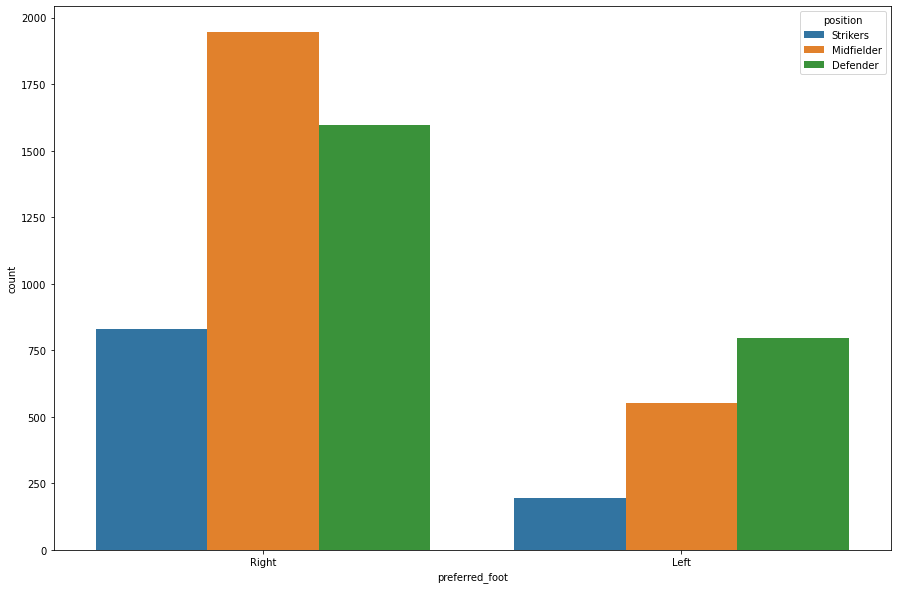

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='preferred_foot', data=fifa19_sel2, hue='position')

All three positions, Strikers, Midfielder,  and Defender are heavily right feet used.

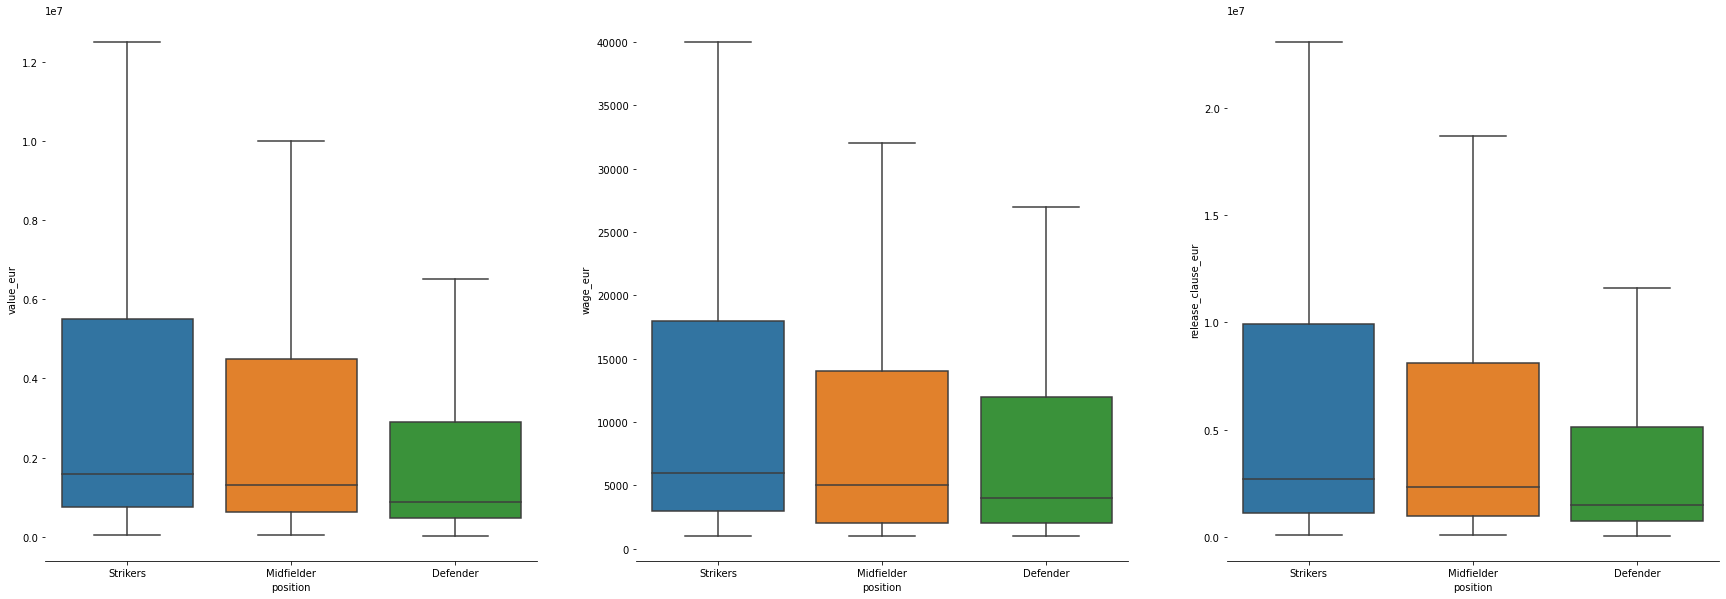

In [14]:
f, axes = plt.subplots(ncols= 3, figsize=(30, 10), sharex=False)
sns.despine(left=True)

sns.boxplot('position', 'value_eur', data = fifa19_sel2, showfliers=False, ax=axes[0])
sns.boxplot('position', 'wage_eur', data = fifa19_sel2, showfliers=False, ax=axes[1])
sns.boxplot('position', 'release_clause_eur', data = fifa19_sel2, showfliers=False, ax=axes[2])

- Strikers tend to have higher value, wage, and Release Clause compared to other positions
- Defender position has the lowest value, wage, and Release Clause.

In [15]:
# Function clean_cell_value:
    # Function to apply to every string cell that should be turned into numerical. 
    # Given a string s of the form number+/-number, return the first number as an integer. 
def clean_cell_value(s):
    # Missing values:
    if not s:
        return 40
    # Strings:
    if type(s) is not str:
        return s
    if '-' in s:
        return int(s.split('-')[0])
    if '+' in s:
        return int(s.split('+')[0])
    return int(s)

# Function clean data strings
    # Given a dataframe of data from Fifa, turn all data that should be numerical into numerical data. 
    # Convert from strings if needed. 
def clean_data_strings(df):
    df_cleaned = df.copy()
    numerical_columns = ["age","height_cm","weight_kg","overall","potential","value_eur",
                        "international_reputation","weak_foot","skill_moves","release_clause_eur","contract_valid_until", 
                        "nation_jersey_number","pace","shooting","passing","dribbling","defending","physic","gk_diving",
                        "gk_handling","gk_kicking","gk_reflexes","gk_speed","gk_positioning","attacking_crossing",
                        "attacking_finishing","attacking_heading_accuracy","attacking_short_passing",
                        "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing",
                        "skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility",
                        "movement_reactions","movement_balance","power_shot_power","power_jumping","power_stamina",
                        "power_strength","power_long_shots","mentality_aggression","mentality_interceptions",
                        "mentality_positioning","mentality_vision","mentality_penalties","mentality_composure",
                        "defending_marking","defending_standing_tackle","defending_sliding_tackle","goalkeeping_diving",
                         "goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes",
                        "ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm",
                         "cdm","rdm","rwb","lb","lcb","cb","rcb","rb" ]
    for col in numerical_columns:
        if df_cleaned[col].dtypes!=object:
            continue
        df_cleaned[col] = df_cleaned[col].apply(clean_cell_value)
    return df_cleaned


In [16]:
# load data
fifa19_df = pd.read_csv('data/players_19.csv')

In [17]:
fifa19_df_new = create_position(fifa19_df)
fifa19_df_new.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,Strikers
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2,Strikers
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,Midfielder
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,Midfielder


In [18]:
fifa19_df_clean = clean_data_strings(fifa19_df_new)
print(fifa19_df_clean.dtypes)

sofifa_id       int64
player_url     object
short_name     object
long_name      object
age             int64
               ...   
lcb           float64
cb            float64
rcb           float64
rb            float64
position       object
Length: 105, dtype: object


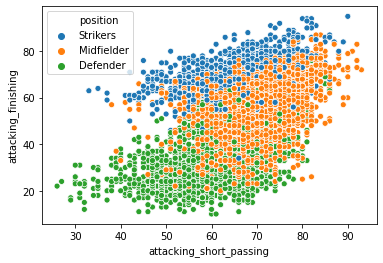

In [19]:
#Scatter plot attacking_finishing by attacking_short_passing classified by position
ax = sns.scatterplot(x="attacking_short_passing", y="attacking_finishing", hue="position",data=fifa19_df_clean)

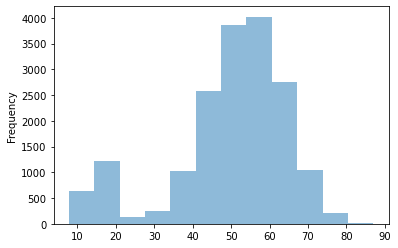

In [20]:
column_list =['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
                        'attacking_volleys']
df_attacking = fifa19_df_clean[column_list].mean(axis=1)
#display(df_attacking)

ax = fifa19_df_clean[column_list].mean(axis=1).plot.hist(bins=12, alpha = 0.5)

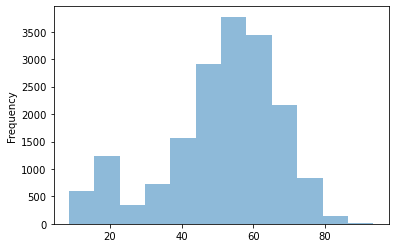

In [21]:
column_list =['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
                        'skill_ball_control']
df_skill = fifa19_df_clean[column_list].mean(axis=1)

ax = df_skill.plot.hist(bins=12, alpha = 0.5)

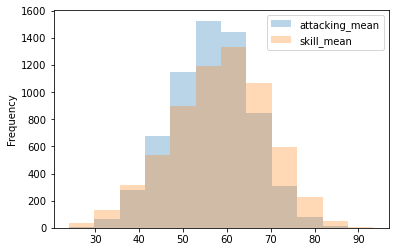

In [22]:
#result = pd.concat([df_attacking, df_skill, fifa19_df_new[['position']]], axis=1, join='inner')

result = pd.DataFrame(pd.concat([df_attacking, df_skill, fifa19_df_new[['position']]], axis=1, join='inner').values,
                     columns = ['attacking_mean', 'skill_mean', 'position'])
#display(result)
result = result.dropna()
#display(result)

ax = result.plot.hist(bins=12, alpha = 0.3)

Text(0.5, 0, 'movement mean')

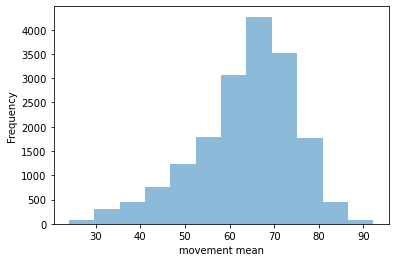

In [23]:
column_list =['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
                        'movement_balance']
df_movement = fifa19_df_clean[column_list].mean(axis=1)

ax = df_movement.plot.hist(bins=12, alpha = 0.5)
ax.set_xlabel('movement mean')

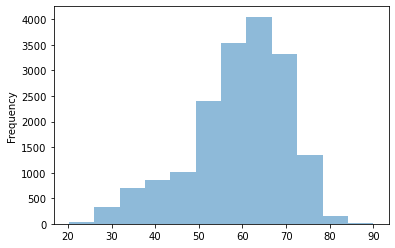

In [24]:
column_list =['power_shot_power','power_jumping','power_stamina',"power_strength","power_long_shots"]
df_power = fifa19_df_clean[column_list].mean(axis=1)

ax = df_power.plot.hist(bins=12, alpha = 0.5)

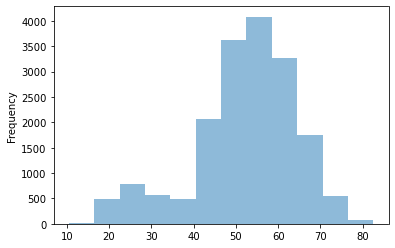

In [25]:
column_list =["mentality_aggression","mentality_interceptions", "mentality_positioning","mentality_vision",
              "mentality_penalties","mentality_composure"]
df_mentality = fifa19_df_clean[column_list].mean(axis=1)

ax = df_mentality.plot.hist(bins=12, alpha = 0.5)

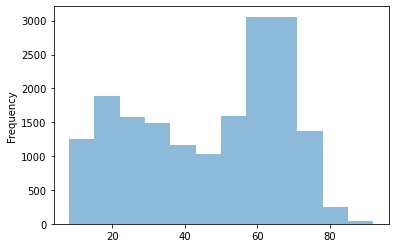

In [26]:
column_list =["defending_marking","defending_standing_tackle","defending_sliding_tackle"]
df_defending = fifa19_df_clean[column_list].mean(axis=1)

ax = df_defending.plot.hist(bins=12, alpha = 0.5)

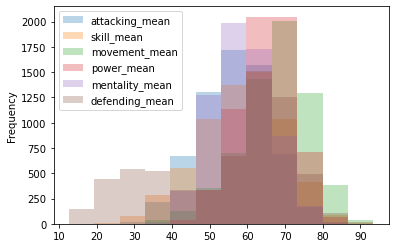

In [27]:
result_19 = pd.DataFrame(pd.concat([df_attacking, df_skill, df_movement, df_power, df_mentality, df_defending, fifa19_df_clean[['team_position']], fifa19_df_clean[['position']]], axis=1, join='inner').values,
                     columns = ['attacking_mean', 'skill_mean', 'movement_mean',
                                'power_mean','mentality_mean','defending_mean', 'team_position', 'position'])
#display(result_19)
result_19 = result_19.dropna()
#display(result_19)

ax = result_19.plot.hist(bins=12, alpha = 0.3)

In [28]:
display(result_19.head())

,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean,team_position,position
0,87,83.2,86.6,90,74.8333,27.3333,LW,Strikers
1,83.6,93.4,91.6,75.6,71.5,29,RW,Strikers
2,79.2,88.8,91.6,70.6,73.8333,28,CAM,Midfielder
4,81,87.2,80.2,82,80.6667,58.6667,RCM,Midfielder
5,72.2,71.4,76,78.8,72.8333,90.6667,LCB,Defender


In [29]:
def create_position2(df):
    df_new = df.copy()
    
    df_new.loc[df.position == 'Strikers', 'position_class'] = int(0)

    
    df_new.loc[df.position == 'Midfielder' , 'position_class'] = int(1)

    
    df_new.loc[df.position == 'Defender' , 'position_class'] = int(2)
    
    return df_new

In [30]:
result_19_new = create_position2(result_19)
result_19_new.head()

,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean,team_position,position,position_class
0,87,83.2,86.6,90,74.8333,27.3333,LW,Strikers,0.0
1,83.6,93.4,91.6,75.6,71.5,29,RW,Strikers,0.0
2,79.2,88.8,91.6,70.6,73.8333,28,CAM,Midfielder,1.0
4,81,87.2,80.2,82,80.6667,58.6667,RCM,Midfielder,1.0
5,72.2,71.4,76,78.8,72.8333,90.6667,LCB,Defender,2.0


In [31]:
X_train = result_19_new.drop(['position', 'position_class', 'team_position'],axis=1)
y_train = result_19_new['position_class']

X_train

,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean
0,87,83.2,86.6,90,74.8333,27.3333
1,83.6,93.4,91.6,75.6,71.5,29
2,79.2,88.8,91.6,70.6,73.8333,28
4,81,87.2,80.2,82,80.6667,58.6667
5,72.2,71.4,76,78.8,72.8333,90.6667
...,...,...,...,...,...,...
17579,44.2,38,72.4,54,43.5,18.3333
17594,44,48.2,65,44.4,44,39.6667
17633,45.4,38.8,55,47.2,41.5,19.3333
17745,40.4,40.4,55.4,52.2,46.1667,47


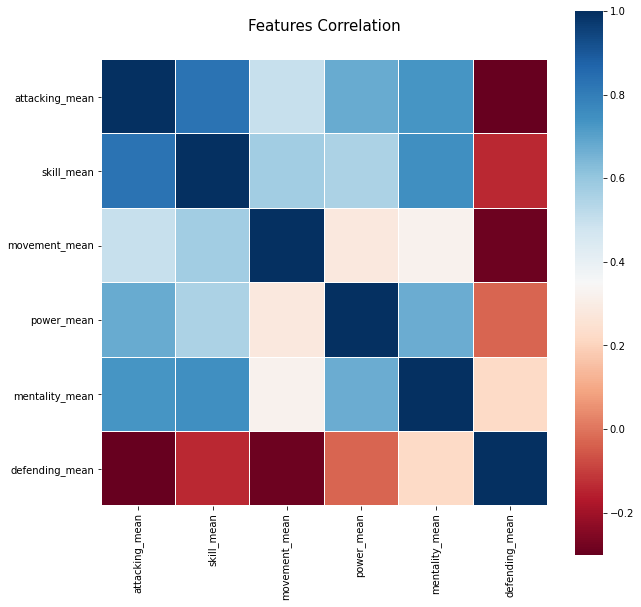

In [32]:
# Create the heat map of features correlation
plt.figure(figsize=(10,10))
plt.title('Features Correlation', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths= 0.1,vmax= 1.0, 
            square=True, cmap=plt.cm.RdBu, annot=False)
plt.show()

### Scaling Data

In [33]:
# scale data
scaler = StandardScaler()

# fit on train
scaler.fit(X_train)

# transform on train and test
#scaled_X_train = ct_scale.transform(X_train)
scaled_X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
#scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_train.head()

,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean
0,3.319851,2.251479,2.078904,3.465311,2.089103,-1.544106
1,2.948779,3.177689,2.618112,1.471915,1.661970,-1.449393
2,2.468570,2.759986,2.618112,0.779763,1.960963,-1.506221
3,2.665019,2.614698,1.388718,2.357868,2.836585,0.236501
4,1.704600,1.179980,0.935783,1.914891,1.832823,2.054994


### OvR logistic regression

In [34]:
# Create a logistic regression model, with 'none' as the penalty and 'ovr' as multi_class
logit_ovr = LogisticRegression(penalty='none', multi_class='ovr',max_iter = 1000)

#Fit the model using the training set
#logit_ovr.fit(X_train, y_train)
logit_ovr.fit(scaled_X_train, y_train)

# Get the coefficient estimates
print("Logistic Regression Estimated Betas: ",logit_ovr.coef_,logit_ovr.intercept_)

Logistic Regression Estimated Betas:  [[ 1.28396077 -1.38915145 -0.13607538  0.34088393  0.48203085 -2.2597038 ]
 [-1.00027899  1.63828869 -0.0125108  -0.17049283  0.41326208 -0.41883168]
 [ 0.25927034 -0.6516527   0.30364444 -0.26918385 -1.69441825  4.29419064]] [-3.03447217 -0.41291038 -1.95455219]


In [35]:
# calculate initial accuracy on train
train_score = logit_ovr.score(scaled_X_train, y_train)

print(f'train_score: {train_score*100:.2f}%')

train_score: 77.21%


### Multinomial logistic regression

In [36]:
# Create a logistic regression model, with 'none' as the penalty and 'multinomial' as multi_class
logit_multi = LogisticRegression(penalty='none', multi_class='multinomial',max_iter = 1000)

#Fit the model using the training set
#logit_multi.fit(X_train, y_train)
logit_multi.fit(scaled_X_train, y_train)

# Get the coefficient estimates
print("Logistic Regression Estimated Betas:",logit_multi.coef_,logit_multi.intercept_)

Logistic Regression Estimated Betas: [[ 0.74532313 -0.7462883  -0.19759913  0.29860704  0.83073722 -2.70034988]
 [-0.52600113  0.72535857 -0.05094114 -0.02133977  0.42236041 -0.75003237]
 [-0.219322    0.02092973  0.24854027 -0.27726726 -1.25309763  3.45038225]] [-1.100834    1.48157326 -0.38073926]


In [37]:
# calculate initial accuracy on train
train_score = logit_multi.score(scaled_X_train, y_train)

print(f'train_score: {train_score*100:.2f}%')

train_score: 78.51%


### Prediction on Test set

In [38]:
fifa20_df = pd.read_csv('data/players_20.csv')
fifa20_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [39]:
fifa20_df_new = create_position(fifa20_df)
fifa20_df_clean = clean_data_strings(fifa20_df_new)

In [40]:
column_list =['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing',
                        'attacking_volleys']
df_attacking = fifa20_df_clean[column_list].mean(axis=1)
#display(df_attacking)

column_list =['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing',
                        'skill_ball_control']
df_skill = fifa20_df_clean[column_list].mean(axis=1)

column_list =['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
                        'movement_balance']
df_movement = fifa20_df_clean[column_list].mean(axis=1)

column_list =['power_shot_power','power_jumping','power_stamina',"power_strength","power_long_shots"]
df_power = fifa20_df_clean[column_list].mean(axis=1)

column_list =["mentality_aggression","mentality_interceptions", "mentality_positioning","mentality_vision",
              "mentality_penalties","mentality_composure"]
df_mentality = fifa19_df_clean[column_list].mean(axis=1)

column_list =["defending_marking","defending_standing_tackle","defending_sliding_tackle"]
df_defending = fifa19_df_clean[column_list].mean(axis=1)

In [41]:
result_20 = pd.DataFrame(pd.concat([df_attacking, df_skill, df_movement, df_power, df_mentality, df_defending, 
                                    fifa20_df_clean[['team_position']], fifa20_df_clean[['position']]], axis=1, join='inner').values,
                     columns = ['attacking_mean', 'skill_mean', 'mean_movement',
                                'mean_power','mean_mentality','mean_defending', 'team_position', 'position'])

result_20 = result_20.dropna()

In [42]:
result_20_new = create_position2(result_20)
result_20_new.head()

,attacking_mean,skill_mean,mean_movement,mean_power,mean_mentality,mean_defending,team_position,position,position_class
0,86.6,94.4,91.6,78.2,74.8333,27.3333,RW,Strikers,0.0
1,87.4,83,86.8,89.2,71.5,29,LW,Strikers,0.0
2,82,89.4,91,71,73.8333,28,CAM,Midfielder,1.0
4,79.6,86.8,92.2,73,80.6667,58.6667,LW,Strikers,0.0
5,80.8,87.2,79.6,81.4,72.8333,90.6667,RCM,Midfielder,1.0


In [43]:
X_test = result_20_new.drop(['position', 'position_class', 'team_position'],axis=1)
y_test = result_20_new['position_class']
y_test

0        0.0
1        0.0
2        1.0
4        0.0
5        1.0
        ... 
17620    2.0
17727    2.0
17729    1.0
17733    2.0
17763    2.0
Name: position_class, Length: 6585, dtype: float64

In [44]:
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test.head()

,attacking_mean,skill_mean,mean_movement,mean_power,mean_mentality,mean_defending
0,3.276195,3.268494,2.618112,1.831833,2.089103,-1.544106
1,3.363506,2.233318,2.100473,3.354566,1.661970,-1.449393
2,2.774158,2.814469,2.553407,0.835135,1.960963,-1.506221
3,2.512225,2.578376,2.682817,1.111996,2.836585,0.236501
4,2.643191,2.614698,1.324013,2.274810,1.832823,2.054994


In [45]:
# OvR logistic regression
# calculate accuracy on the test set
test_score = logit_ovr.score(scaled_X_test, y_test)
print(f'test_score: {test_score*100:.2f}%')

test_score: 43.66%


In [46]:
# Multinomial logistic regression
# calculate accuracy on the test set
test_score = logit_multi.score(scaled_X_test, y_test)
print(f'test_score: {test_score*100:.2f}%')

test_score: 41.14%


## Neural Networks

In [47]:
import tensorflow as tf
from tensorflow.keras import optimizers
tf.__version__

'2.2.0'

In [48]:
one_hot_df = pd.get_dummies(result_19_new['position'], prefix='position')
one_hot_df.head()

,position_Defender,position_Midfielder,position_Strikers
0,0,0,1
1,0,0,1
2,0,1,0
4,0,1,0
5,1,0,0


In [49]:
# The predictor variables are all columns
X_train_np = X_train.values.astype(np.float32)

# The response variable is the one-hot-encoded values
y_train_np = one_hot_df.values

X_train_np.shape, y_train_np.shape
#X_train_np.dtype, y_train_np.dtype

((6384, 6), (6384, 3))

In [50]:
# To build the MLP, we will use the keras library
model = tf.keras.models.Sequential(name='FIFA')
# The number of nodes in a hidden layer
n_hidden = 100
# The number of nodes in the input layer (features)
n_input = 6
# The number of nodes in the output layer
n_output = 3

# We add the first hidden layer with `n_hidden` number of neurons 
# and 'relu' activation
model.add((tf.keras.layers.Dense(n_hidden, input_dim=n_input, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
#model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))

# The second layer is the final layer in our case, using 'softmax' on the output labels
model.add(tf.keras.layers.Dense(n_output, activation = 'softmax',name='output'))

In [51]:
# Now we compile the model using 'categorical_crossentropy' loss, 
# optimizer as 'sgd' and 'accuracy' as a metric
#optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='sgd', 
              #optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# You can see an overview of the model you built using .summary()
model.summary()

Model: "FIFA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 3)                 303       
Total params: 31,303
Trainable params: 31,303
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X_train_np,y_train_np, epochs = 60, 
                    batch_size = 32,verbose=1,validation_split=0.1)

Epoch 1/60
180/180 [==============================] - 1s 4ms/step - loss: 1.2573 - accuracy: 0.6507 - val_loss: 0.6411 - val_accuracy: 0.6980
Epoch 2/60
180/180 [==============================] - 1s 3ms/step - loss: 0.5702 - accuracy: 0.7258 - val_loss: 0.5651 - val_accuracy: 0.7355
Epoch 3/60
180/180 [==============================] - 1s 3ms/step - loss: 0.5452 - accuracy: 0.7394 - val_loss: 0.6487 - val_accuracy: 0.6870
Epoch 4/60
180/180 [==============================] - 1s 3ms/step - loss: 0.5198 - accuracy: 0.7502 - val_loss: 0.6406 - val_accuracy: 0.7058
Epoch 5/60
180/180 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.7614 - val_loss: 0.5676 - val_accuracy: 0.7606
Epoch 6/60
180/180 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7598 - val_loss: 0.6528 - val_accuracy: 0.6854
Epoch 7/60
180/180 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7648 - val_loss: 0.7869 - val_accuracy: 0.6338
Epoch 

180/180 [==============================] - 1s 3ms/step - loss: 0.4495 - accuracy: 0.7965 - val_loss: 0.5700 - val_accuracy: 0.7590
Epoch 59/60
180/180 [==============================] - 1s 4ms/step - loss: 0.4447 - accuracy: 0.7955 - val_loss: 0.5999 - val_accuracy: 0.7371
Epoch 60/60
180/180 [==============================] - 1s 3ms/step - loss: 0.4458 - accuracy: 0.7988 - val_loss: 0.5902 - val_accuracy: 0.7465


Text(0.5, 0.98, 'MLP Training')

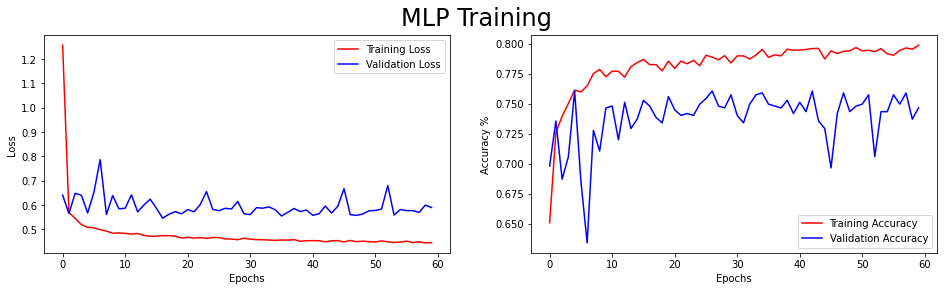

In [53]:
# Here we plot the training and validation loss and accuracy

fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history.history['loss'],'r',label = 'Training Loss')
ax[0].plot(history.history['val_loss'],'b',label = 'Validation Loss')
ax[1].plot(history.history['accuracy'],'r',label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

In [54]:
one_hot_df = pd.get_dummies(result_20_new['position'], prefix='position')
#one_hot_df

In [55]:
# The predictor variables are all columns
X_test_np = X_test.values.astype(np.float32)

# The response variable is the one-hot-encoded values
y_test_np = one_hot_df.values

X_test_np.shape, y_test_np.shape

((6585, 6), (6585, 3))

In [56]:
train_accuracy = model.evaluate(X_train_np, y_train_np)[1]
test_accuracy = model.evaluate(X_test_np, y_test_np)[1]
print(f'The training set accuracy for the model is {train_accuracy}\
    \nThe test set accuracy for the model is {test_accuracy}')

206/206 [==============================] - 1s 3ms/step - loss: 2.0131 - accuracy: 0.4352
The training set accuracy for the model is 0.788690447807312    
The test set accuracy for the model is 0.43523159623146057


### Using the original team_position

In [57]:
one_hot_df = pd.get_dummies(result_19_new['team_position'], prefix='team')
one_hot_df.head()

# The response variable is the one-hot-encoded values
y_train_np = one_hot_df.values

In [58]:
# To build the MLP, we will use the keras library
model = tf.keras.models.Sequential(name='FIFA')
# The number of nodes in a hidden layer
n_hidden = 100
# The number of nodes in the input layer (features)
n_input = 6
# The number of nodes in the output layer
n_output = 26

# We add the first hidden layer with `n_hidden` number of neurons 
# and 'relu' activation
model.add((tf.keras.layers.Dense(n_hidden, input_dim=n_input, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))
model.add((tf.keras.layers.Dense(n_hidden, activation = 'relu')))

# The second layer is the final layer in our case, using 'softmax' on the output labels
model.add(tf.keras.layers.Dense(n_output, activation = 'softmax',name='output'))

# Now we compile the model using 'categorical_crossentropy' loss, 
# optimizer as 'sgd' and 'accuracy' as a metric
#optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='sgd', 
              #optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# You can see an overview of the model you built using .summary()
model.summary()

Model: "FIFA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 26)                2626   

In [59]:
history = model.fit(X_train_np,y_train_np, epochs = 60, batch_size = 32,verbose=1,validation_split=0.1)

Epoch 1/60
180/180 [==============================] - 1s 5ms/step - loss: 2.4762 - accuracy: 0.2162 - val_loss: 2.4290 - val_accuracy: 0.1878
Epoch 2/60
180/180 [==============================] - 1s 4ms/step - loss: 2.1845 - accuracy: 0.2618 - val_loss: 2.2369 - val_accuracy: 0.2629
Epoch 3/60
180/180 [==============================] - 1s 4ms/step - loss: 2.1093 - accuracy: 0.2748 - val_loss: 2.3098 - val_accuracy: 0.2254
Epoch 4/60
180/180 [==============================] - 1s 3ms/step - loss: 2.0549 - accuracy: 0.2896 - val_loss: 2.2563 - val_accuracy: 0.2629
Epoch 5/60
180/180 [==============================] - 1s 3ms/step - loss: 2.0314 - accuracy: 0.2910 - val_loss: 2.2040 - val_accuracy: 0.2504
Epoch 6/60
180/180 [==============================] - 1s 3ms/step - loss: 2.0098 - accuracy: 0.2921 - val_loss: 2.2730 - val_accuracy: 0.2520
Epoch 7/60
180/180 [==============================] - 1s 3ms/step - loss: 1.9766 - accuracy: 0.2982 - val_loss: 2.5875 - val_accuracy: 0.1909
Epoch 

180/180 [==============================] - 1s 3ms/step - loss: 1.8573 - accuracy: 0.3339 - val_loss: 2.1761 - val_accuracy: 0.2394
Epoch 59/60
180/180 [==============================] - 1s 3ms/step - loss: 1.8569 - accuracy: 0.3314 - val_loss: 2.1760 - val_accuracy: 0.2598
Epoch 60/60
180/180 [==============================] - 1s 4ms/step - loss: 1.8482 - accuracy: 0.3429 - val_loss: 2.2102 - val_accuracy: 0.2285


Text(0.5, 0.98, 'MLP Training')

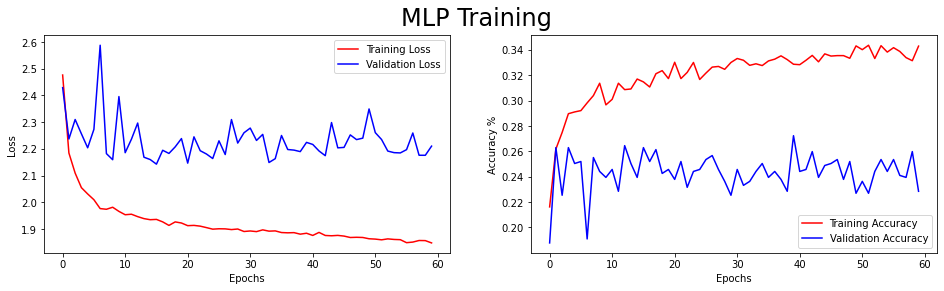

In [60]:
# Here we plot the training and validation loss and accuracy

fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history.history['loss'],'r',label = 'Training Loss')
ax[0].plot(history.history['val_loss'],'b',label = 'Validation Loss')
ax[1].plot(history.history['accuracy'],'r',label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

In [61]:
one_hot_df = pd.get_dummies(result_20_new['team_position'], prefix='team')
one_hot_df.head()

# The response variable is the one-hot-encoded values
y_test_np = one_hot_df.values

In [62]:
train_accuracy = model.evaluate(X_train_np, y_train_np)[1]
test_accuracy = model.evaluate(X_test_np, y_test_np)[1]
print(f'The training set accuracy for the model is {train_accuracy}\
    \nThe test set accuracy for the model is {test_accuracy}')

206/206 [==============================] - 1s 2ms/step - loss: 4.0269 - accuracy: 0.1239
The training set accuracy for the model is 0.3029448688030243    
The test set accuracy for the model is 0.12391799688339233
